# Linear Model improved with one hot encoding

# Introduction

This project takes place in a regression problem. More pricesely, we participate to a kaggle's competition on house prices. The goal here is to understand the statistics behind machine learning. We will then build a model according different set of features in order to able to predict house prices. All along the project we will be using somes methods and techniques that have been introduced during the class of Statistical Foundation of Machine Learning. All along the report, we will first explain what has been done at each step, the reasons that lead us to use different paths and only after that we will give the code needed to reproduce to final results at each steps.

N.B:The evaluation function used to assess the quality of our models is the Root Mean Squared Logarithmic error (RMSLE).
$RMSLE =\sqrt{\frac{1}{n} \sum \left( log (Y.hat+1) - log (Y+1) \right)^2} $

We will go through different steps in order to build a model which will be as close as possible to the real world:

1. We will first go through a features selection in order only consider feature that are the most meaningful for our predictions (according to the data set provided)

2. Once the features have been selected we will now then build our model using different techniques and tuning methods.

3. Finally we will use assembling methods to have the most accurate model

# 1. Feature Selection

As mentioned in the introduction we'll start with the features selection. This step needs to be the first one and is really important since the data that have been gathered may have some noises. Theses noises obviously will have an impact on the quality of the built model. One sure thing is that if the selection is not handled in the right way, that is if we select the bad features, no matter how hard we try, we won't be able to build an accurate model.

One important thing to mention is that before even starting to go through the process of features selection, we have to make an asumption about the model. We have to make an assumption on the distribution from which the real model comes. Is it Gaussian distribution? Binomial? Poisson? ... Is the model linear or not? So since we can't be really sure without testing. We will then test different possibilities and compare the outcomes.
The easiest way is to start with the simplest solution and if needed increase the complexity of the model. We decided then to assume the model is linear and comes from a Gaussian distribution. We will go deeper about that in the section about the models. For now just keep in mind that we applied the feature selections methods to different type of techniques. We only kept the technique that yielded the best results.

There are 3 major groups of features selection methods :

* Filter methods : We used all theses techniques in order to find the best features for our models. The principle behind the filter methods is that we go through a preprocess operation before using the learning algorithm. It means that we don't consider the impact of the features on the algorithm. It's the major downside in using filters. Another one is that this method actually doesn't consider either the impact that may have a combination of variables, their correlation. However they are fast so they can be convenient if one doesn't have too much time to spend on the features selection. The selection is made according to different criteria suchs as:
    * Principle component analysis    
    * Minimum redundancy maximum Relevance
    * Ranking method   
 The ranking method ranks the features according to their relevance. The relevance can be measured with the Pearson correlation (which assumes the model to be linear). The more correlated a feature is, the higher is it's rank. Once the feature have been ranked we need now to determine how many of them will provide the most accurate outcome. So we go from adding the most correlated to the least correlated feature. We then compare the accuracy at each step in order to select the most accurate selection.
* Embedded methods : they perform variable selection as part of the learning procedure and are usually specific to given learning machines. 
* Wrapper methods: This method is the one that provided the best results. The advantage of using such methods is that they assess subsets of variables according to their usefulness to a given predictor. They use the learning algorithm in the selection process so we actually witness the impact of the variables on the learning algorithms. Moreover, the correlation between variables, the impact of the association of some variables is also considere. These methods aims to select the best features combination for a specific learning algorithm. There are kind of wrapper methods:
    * Forward : This methods starts without any features and try each one of them in order to select the one that generates the smallest error. This feature is added to the list of the selected features. We repeat the process with the remaining features by them with the one that have already be added.
    * Backward:

### Results

We started the features selection's process by removing the categorical variables from the numerical ones. It occured to us that we would probably be less accurate since we only kept 37 features out of 78 features. The results proved us right, we then used the one hot encoding in order to be able to use the categorical features during the learning process. By doing so, we went from 37 to 305 features which is actually a lot. We then applied the forward wrapper method coupled with 10 fold cross validation to select the features. The dataset was unusable because by using the cross validation, it occured to us that, some times, the training set contained features with too low variance and it was impossible for the learning algorithm  (especially SVM) to use them. It was then necessaray to clean a little bit more the data by removing the features whose variance was lower than 0.01. The number of transformed categorical features dropped from 268 to 178. We then added the remaining features to the numericals features. From that point we applied the foward wrapper methods with the 10 fold cross validation to our dataset. The used learning algorithms were: Linear Model(LM), Support Vector Machine(SVM), neural network(NNET) and regression trees (RPART). We have to mention that using the foward methods with SVM and NNET takes tremendous amount of time and the more features we have to sort, the more time it takes. We can then summerize our process as follows:
* Load the data
* Remove the categorical features
* Replace all NA values in the numerical features the average of the values actually present.
* apply the one hot encoding (binary) to the categorical features
* remove the transformed categorial features with variance smaller than 0.01
* bind the remaining transformed categorical features with the numerical features
* apply the forward method with 10 fold cross validation to the data set

After conducting our tests, the following variables are those selected for each learning algorithm testes:

* Regression trees: 'OverallQual' 'GrLivArea' 'X1stFlrSF' 'GarageCars'


* Linear Model: 'OverallQual' 'GrLivArea' 'YearBuilt' 'OverallCond' 'GarageCars' 'BsmtFullBath' 'MSSubClass' 'Fireplaces' 'MSZoning_RM' 'Condition1_Norm' 'Neighborhood_NridgHt' 'BsmtExposure_Gd' 'Neighborhood_Crawfor' 'Neighborhood_StoneBr' 'SaleCondition_Abnorml' 'Neighborhood_Somerst' 'BsmtExposure_NA' 'BldgType_2fmCon' 'CentralAir_N' 'ScreenPorch' 'Foundation_PConc' 'Exterior1st_BrkFace' 'LotArea' 'BsmtFinType1_Unf' 'Functional_Typ' 'YearRemodAdd' 'WoodDeckSF' 'MSZoning_RL' 'HeatingQC_Ex' 'LotConfig_CulDSac' 'KitchenQual_Ex' 'Heating_GasW' 'EnclosedPorch' 'Neighborhood_Edwards' 'SaleType_WD' 'MSZoning_FV' 'MSZoning_RH' 'Neighborhood_NoRidge' 'Neighborhood_MeadowV' 'GarageType_Attchd' 'GarageQual_Fa' 'FullBath' 'BsmtQual_Ex' 'LandContour_Bnk' 'Neighborhood_Mitchel' 'BsmtExposure_No' 'TotRmsAbvGrd' 'Functional_Min2' 'Exterior1st_HdBoard' 'Neighborhood_OldTown' 'BsmtQual_Gd' 'ExterCond_TA' 'Id' 'HouseStyle_2Story' 'HalfBath' 'FireplaceQu_NA' 'BsmtFinType2_BLQ''BldgType_Twnhs' 'MasVnrType_BrkCmn' 'Condition1_RRAn' 'Foundation_BrkTil' 'Neighborhood_IDOTRR' 'LotShape_IR2' 'KitchenAbvGr'


* SVM: 'OverallQual' 'GrLivArea' 'TotalBsmtSF' 'YearBuilt' 'OverallCond' 'LotArea' 'BsmtFinSF1' 'SaleCondition_Partial' 'FireplaceQu_NA' 'GarageCars' 'Neighborhood_NAmes' 'MasVnrType_Stone' 'MSZoning_RL' 'Neighborhood_NWAmes' 'Neighborhood_Timber' 'Foundation_PConc' 'BsmtFinType1_ALQ' 'HouseStyle_1.5Fin' 'ExterQual_TA' 'SaleType_New' 'Neighborhood_MeadowV' 'Neighborhood_Edwards' 'Neighborhood_OldTown' 'BldgType_Duplex' 'Fireplaces' 'Neighborhood_CollgCr' 'Neighborhood_Gilbert' 'Neighborhood_Somerst' 'GarageYrBlt' 'SaleCondition_Family' 'Neighborhood_SawyerW' 'Neighborhood_Mitchel' 'KitchenQual_Gd' 'MSZoning_RM' 'Neighborhood_IDOTRR' 'GarageArea' 'Neighborhood_NridgHt' 'MSZoning_FV' 'X1stFlrSF' 'X2ndFlrSF' 'HeatingQC_Ex' 'BsmtExposure_No' 'GarageType_Attchd' 'Neighborhood_Crawfor' 'Exterior1st_Plywood' 'Neighborhood_BrkSide' 'HouseStyle_1Story' 'Condition1_PosN'


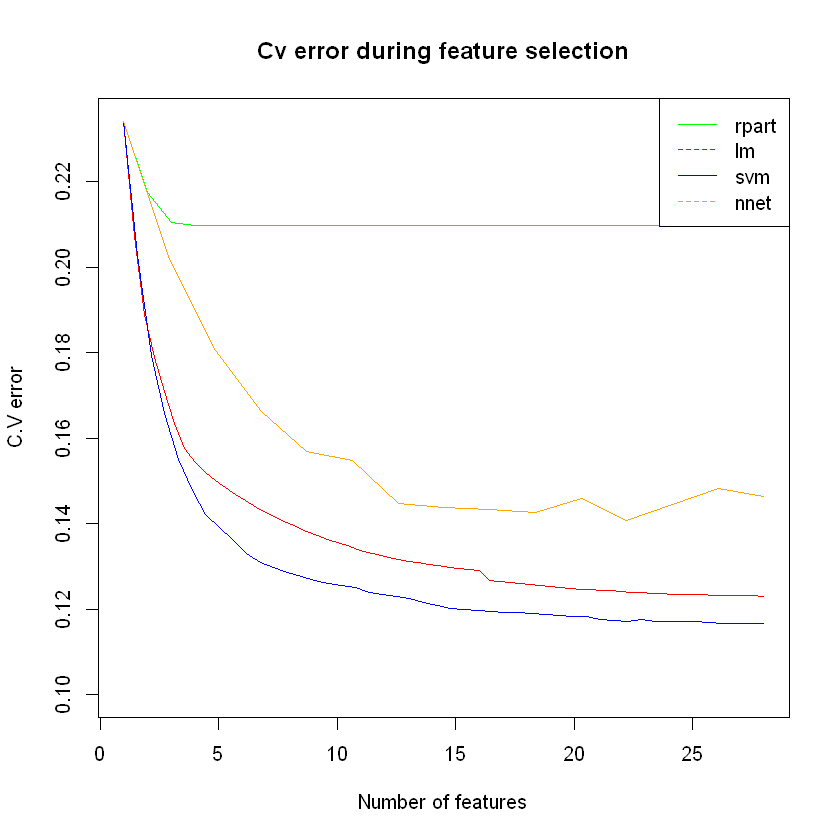

In [4]:
#plot of the cross validation error during the feature selection process
library(ggplot2)
svm_features_error <- c(0.23, 0.1996, 0.177, 0.1637, 0.1534, 0.1462, 0.1409, 0.138, 0.1352, 0.1319, 0.1299, 0.1288, 0.1278, 0.1268, 0.1259, 0.1252, 0.1247, 0.1242, 0.1232, 0.1227, 0.1222, 0.1217, 0.1208, 0.1202, 0.1196, 0.1193, 0.1191, 0.1188, 0.1186, 0.1186, 0.1185, 0.1181, 0.118 , 0.1178, 0.1177, 0.117 , 0.1168, 0.1167, 0.117, 0.1166, 0.1166, 0.1167, 0.1165, 0.1164, 0.1162, 0.1162, 0.1162, 0.1161 )
lm_features_error <-c(0.2299, 0.2038, 0.1861, 0.1764, 0.1686, 0.1615, 0.1558, 0.1525, 0.1504, 0.1485, 0.1469, 0.1453, 0.144 , 0.1425, 0.1413, 0.1402, 0.1391, 0.1381, 0.137 , 0.136 , 0.1352, 0.1344, 0.1337, 0.1329, 0.1323, 0.1317, 0.1311, 0.1307, 0.1302, 0.1299, 0.1296, 0.1293, 0.1289, 0.1286, 0.1284, 0.1281, 0.1259, 0.1256, 0.1254, 0.1251, 0.1249, 0.1247, 0.1245, 0.1243, 0.1241, 0.1239, 0.1238, 0.1236, 0.1235, 0.1234, 0.1232, 0.1231, 0.123 , 0.1229, 0.1228, 0.1227, 0.1226, 0.1226, 0.1225, 0.1225, 0.1225, 0.1224, 0.1224, 0.1223)
rpart_features_error <- c(0.2342, 0.2175, 0.2106, 0.2098,0.2098,0.2098,0.2098,0.2098,0.2098,0.2098,0.2098,0.2098,0.2098,0.2098,0.2098,0.2098,0.2098,0.2098,0.2098,0.2098,0.2098,0.2098,0.2098,0.2098,0.2098,0.2098,0.2098,0.2098)
nnet_features_error <- c(0.23, 0.1987, 0.1781, 0.1641, 0.1552, 0.1531, 0.1434, 0.1424, 0.1419, 0.1412, 0.1445, 0.1395, 0.1431, 0.1467, 0.145)
plot(y=rpart_features_error,x=1:length(rpart_features_error),ylim=c(0.1,max(rpart_features_error)),type= 'l',col='green',xlab = "",ylab = "")
par(new=TRUE)
     
plot(y=lm_features_error,x=1:length(lm_features_error),ylim=c(0.1,max(lm_features_error)),main="Cv error during feature selection",type= 'l',col='red',axes=FALSE,xlab = "",ylab = "")

par(new=TRUE)
     
plot(y=svm_features_error,x=1:length(svm_features_error),ylim=c(0.1,max(svm_features_error)),type= 'l',col='blue',axes=FALSE,ylab = "C.V error",xlab = "Number of features")

par(new=T)
plot(y=nnet_features_error,x=1:length(nnet_features_error),ylim=c(0.1,max(nnet_features_error)),type= 'l',col='orange',axes=FALSE,ylab = "",xlab = "")

legend("topright", legend=c("rpart", "lm","svm","nnet"), col=c("green", "red","blue","orange"), lty=1:2)

# 2. Model selection

In order to select the appropriate model, we applied the feature selection process to a bunch of learning algorithms an kept those yielding good results. Different methods have been coupled in order to assess the quality of our models:

* 10 fold Cross validation : The purpose here is to split the dataset into 2 sets(the training and the test sets). Applying a 10 fold means that we have a ratio of 90% of the data used for the training set and the remaining 10% for the test set. During an iterative process, we change the set 10 times.  At the end of the $10^{th}$ iteration, we average the obtained errors to have the final cross validation error to assess the quality of our model.
* Bootstrapping (resampling) : Bootstrapping is a sampling technique in which we choose $n$ observations out of the original dataset of $n$ rows as well. The key is that each row is selected with replacement from the original dataset so that each row is equally likely to be selected in each iteration. It allows to obtain a new sample. For example: If we have as sample [1,2,3], by applying the boostrap we may have the following new samples [1,1,3], [1,2,1], ...


We used the following techniques to conduct our tests:
* Linear Model (LM)
* Support Vector Machine (SVM)
* Regression trees (RPART)
* Neural Network (NNET)

As we said during the previous section, we started using the linear model algorithm. This algorithm implies that the built model is linear and that the data come from a normal distribution. After building the very first model using LM, it occured to us that some of predictions were negatives values which is totally wrong. In order to ensure positive values, we decided to change the scale of the real outcomes so we used a Log-transformed linear regression that is we trained our models on **$log(Y)$**. The model will still be linear but on a logarithmic scale. By Training the model on log(Y), it is very important to transform the prediction back to the original scale by applying an exponential transformation of the prediction because $E[log(yi)] \neq log(E[yi])$. We used the same logic for each learning algorithm tested.

After conducting all our tests, it was clear that SVM gave the best results. In one of the following cells, the SVM has a CV error of 0.0166. However, the test on Kaggle gave an error of 0.14 which meant that our model was overfitting. Even though the error was bi

NB: We had to test the number of nodes that yield the best results with neural network. Basically, we applied the feature selection on NNET for a number of hidden layer between 1 and 10. We then choose the best combination which was a neural network with 5 hidden layers.


# 3. Ensembling Models

Ensembling is a technique of combining two or more algorithms of similar or dissimilar types called base learners. This is made to build a robust model which will contain the prediction of all those base learners. There numerous types of ensembling techniques and among them we have: averaging, majority vote, weighted average, ...
For this project, we used two different techniques:

* Bagging: The bagging technique use at the same time the averaging and the boost techniques. Basically we use the boostrap to produce $n$ samples. We then build $n$ different models and apply either averaging, majority vote or weighted average. During our tests we averaged the $n$ models. The advantage of using the bagging method is that the accuracy is improved by reducing the variance.
* Stacking: The stacking methods works with a system of layers and nodes. At the bottom layer, we have a number of node which in reality are models (using different learning algorithms). Each node (the models) makes a prediction and send that prediction to a root node. The sent predictions are used as features by the central model (root node) in order to make a prediction based on the other previous predictions. For this project we used as bottom node models based on SVM, LM, regression trees. The central model is built using also SVM. The advantage of using the stacking technique is that since each learning algorithm can make their predictions using different features, we therefore can actually combine different predictions based of different features.

As you can see, we chose to implement the stacking method which gave us the best results. At the bottom layer, we used LM,SVM,NNET and RPART. The top layer use LM to make the final decision. We splitted the training set in two parts. The bottom layer use the first part to train and they make a prediction on the second part. Their predictions are then sent to the top layer as features to make the final prediction on the second part of the training set. Using this method allowed us to reach CV error of 0.097 with the training set.  However, we could only reach a score of 0.12966 on kaggle. This final score has been obtained by removing the decision trees predictions from the bottom layer.

### Call libraries

In [5]:
#LM with one hot encoding
#librairies
library(dummies)
library(corrplot)
#library(Hmisc)
library(e1071)
library(rpart)
library(nnet)


dummies-1.5.6 provided by Decision Patterns



### Define the functions

In [6]:


#function
# ++++++++++++++++++++++++++++
# flattenCorrMatrix
# ++++++++++++++++++++++++++++
# cormat : matrix of the correlation coefficients
# pmat : matrix of the correlation p-values
flattenCorrMatrix <- function(cormat, pmat) {
  ut <- upper.tri(cormat)
  data.frame(
    row = rownames(cormat)[row(cormat)[ut]],
    column = rownames(cormat)[col(cormat)[ut]],
    cor  =(cormat)[ut],
    p = pmat[ut]
    )
}
#replace missing values
replace_na_with_mean_value<-function(vec) {
    mean_vec<-mean(vec,na.rm=T)
    vec[is.na(vec)]<-mean_vec
    vec
}


remove_low_var = function(data, tol) {
  lr="\n"
  n = nrow(data)
  to.remove = NULL
  for(var in colnames(data)) {
    table = table(data[,var], exclude=NULL)
    
    variance = (max(table)-min(table))/n
    
    len =length(table)
    if(len == 1 || variance> tol) {
      to.remove = cbind(to.remove,var)
    }
  }
  cat("Removed: ", to.remove, lr)
  to.keep = setdiff(colnames(data),to.remove)
  data[,to.keep]
}



computeRMSLE <-function(Y.hat,Y){
Y.hat[Y.hat<0] <- 0    #make sure that there is no negative values
Y.hat.log <- log(Y.hat+1) 
Y.log <- log(Y+1)
avg <- mean(Y.hat.log- Y.log)^2      
sqrt(avg)

}


### Load the data

In [19]:
#load the data
data<-read.csv("datasets/train.csv")
data_test <- read.csv("datasets/test.csv")

### process the data by removing the factors

In [20]:
##get the variables that are factors to remove them from the training
factor_variables<-which(sapply(data[1,],class)=="factor")

data_preprocessed<-data[,-factor_variables]
data_test_preprocessed<-data_test[,-factor_variables]


data_preprocessed<-data.frame(apply(data_preprocessed,2,replace_na_with_mean_value))
data_test_preprocessed<-data.frame(apply(data_test_preprocessed,2,replace_na_with_mean_value))

### use one hot encoding


In [22]:
#one hot encoding
data_factor<-data[,factor_variables]
data_test_factor<-data_test[,factor_variables]

data_factor_onehot <- dummy.data.frame(data_factor, sep="_")
data_test_factor_onehot <- dummy.data.frame(data_test_factor,sep="_")
#remove the low variance features from the training set
data_factor_onehot <- remove_low_var(data_factor_onehot,0.99)


Removed:  MSZoning_C (all) Street_Grvl Street_Pave LotShape_IR3 Utilities_AllPub Utilities_NoSeWa LotConfig_FR3 LandSlope_Sev Neighborhood_Blueste Neighborhood_NPkVill Neighborhood_Veenker Condition1_PosA Condition1_RRAe Condition1_RRNe Condition1_RRNn Condition2_Artery Condition2_Feedr Condition2_PosA Condition2_PosN Condition2_RRAe Condition2_RRAn Condition2_RRNn HouseStyle_1.5Unf HouseStyle_2.5Fin HouseStyle_2.5Unf RoofStyle_Flat RoofStyle_Gambrel RoofStyle_Mansard RoofStyle_Shed RoofMatl_ClyTile RoofMatl_Membran RoofMatl_Metal RoofMatl_Roll RoofMatl_Tar&Grv RoofMatl_WdShake RoofMatl_WdShngl Exterior1st_AsphShn Exterior1st_BrkComm Exterior1st_CBlock Exterior1st_ImStucc Exterior1st_Stone Exterior2nd_AsphShn Exterior2nd_Brk Cmn Exterior2nd_CBlock Exterior2nd_ImStucc Exterior2nd_Other Exterior2nd_Stone MasVnrType_NA ExterQual_Fa ExterCond_Ex ExterCond_Po Foundation_Stone Foundation_Wood BsmtCond_Po BsmtFinType2_GLQ Heating_Floor Heating_Grav Heating_OthW Heating_Wall HeatingQC_Po Elect

In [23]:
#Here we merge the feature get from the one hot encoding with the numerical ones
data_preprocessed_one_hot <- cbind(data_preprocessed,data_factor_onehot)
data_test_preprocessed_one_hot <- cbind(data_test_preprocessed,data_test_factor_onehot)

X<-data_preprocessed_one_hot[,setdiff(colnames(data_preprocessed_one_hot),"SalePrice")]
X_test<-data_test_preprocessed_one_hot[,setdiff(colnames(data_test_preprocessed_one_hot),"SalePrice")]

Y<-data_preprocessed[,"SalePrice"]

N<-nrow(X)    #Number of examples
n<-ncol(X)    #Number of input variables


### Features selection for LM

In [1]:
#wrapper rpart one hot
size.CV<-floor(N/10)
set.seed(3)
selected<-NULL

for (round in 1:(n_extended)) { 
    candidates<-setdiff(1:n_extended,selected)
    
    CV.err<-matrix(0,nrow=length(candidates),ncol=10)
    
    for (j in 1:length(candidates)) {
        features_to_include<-c(selected,candidates[j])
        
        for (i in 1:10) {
            i.ts<-(((i-1)*size.CV+1):(i*size.CV))              
            X.ts<-X[i.ts,features_to_include,drop=F]  
            Y.ts<-Y[i.ts]
     
            i.tr<-setdiff(1:N,i.ts)
           # i.tr.resample<-sample(i.tr,rep=T)
            X.tr<-X[i.tr,features_to_include,drop=F]
            Y.tr<-Y[i.tr]
     
            DS<-cbind(X.tr,SalePrice=log(Y.tr+1))
            model<- lm(SalePrice~.,DS)
        
            Y.hat.ts<- predict(model,X.ts)
        
            CV.err[j,i]<-sqrt(mean((Y.hat.ts-log(Y.ts+1))^2))
        }
    }
    CV.err.mean<-apply(CV.err,1,mean)
    CV.err.sd<-apply(CV.err,1,sd)
    selected_current<-which.min(CV.err.mean)              
    selected<-c(selected,candidates[selected_current])
    print(paste("Round ",round," ; Selected feature: ",candidates[selected_current]," ; CV error=",round(CV.err.mean[selected_current],digits=4), " ; std dev=",round(CV.err.sd[selected_current],digits=4)))

}


ERROR: Error in eval(expr, envir, enclos): objet 'N' introuvable


### Features selection for Regression trees

In [ ]:
#wrapper rpart one hot
size.CV<-floor(N/10)
set.seed(3)
selected<-NULL

for (round in 1:(n_extended)) { 
    candidates<-setdiff(1:n_extended,selected)
    
    CV.err<-matrix(0,nrow=length(candidates),ncol=10)
    
    for (j in 1:length(candidates)) {
        features_to_include<-c(selected,candidates[j])
        
        for (i in 1:10) {
            i.ts<-(((i-1)*size.CV+1):(i*size.CV))              
            X.ts<-X[i.ts,features_to_include,drop=F]  
            Y.ts<-Y[i.ts]
     
            i.tr<-setdiff(1:N,i.ts)
           # i.tr.resample<-sample(i.tr,rep=T)
            X.tr<-X[i.tr,features_to_include,drop=F]
            Y.tr<-Y[i.tr]
     
            DS<-cbind(X.tr,SalePrice=log(Y.tr+1))
            model<- rpart(SalePrice~.,DS)
        
            Y.hat.ts<- predict(model,X.ts)
        
            CV.err[j,i]<-sqrt(mean((Y.hat.ts-log(Y.ts+1))^2))
        }
    }
    CV.err.mean<-apply(CV.err,1,mean)
    CV.err.sd<-apply(CV.err,1,sd)
    selected_current<-which.min(CV.err.mean)              
    selected<-c(selected,candidates[selected_current])
    print(paste("Round ",round," ; Selected feature: ",candidates[selected_current]," ; CV error=",round(CV.err.mean[selected_current],digits=4), " ; std dev=",round(CV.err.sd[selected_current],digits=4)))

}

### Features selection for SVM

In [ ]:
#wrapper rpart one hot
size.CV<-floor(N/10)
set.seed(3)
selected<-NULL

for (round in 1:(n_extended)) { 
    candidates<-setdiff(1:n_extended,selected)
    
    CV.err<-matrix(0,nrow=length(candidates),ncol=10)
    
    for (j in 1:length(candidates)) {
        features_to_include<-c(selected,candidates[j])
        
        for (i in 1:10) {
            i.ts<-(((i-1)*size.CV+1):(i*size.CV))              
            X.ts<-X[i.ts,features_to_include,drop=F]  
            Y.ts<-Y[i.ts]
     
            i.tr<-setdiff(1:N,i.ts)
           # i.tr.resample<-sample(i.tr,rep=T)
            X.tr<-X[i.tr,features_to_include,drop=F]
            Y.tr<-Y[i.tr]
     
            DS<-cbind(X.tr,SalePrice=log(Y.tr+1))
            model<- svm(SalePrice~.,DS)
        
            Y.hat.ts<- predict(model,X.ts)
        
            CV.err[j,i]<-sqrt(mean((Y.hat.ts-log(Y.ts+1))^2))
        }
    }
    CV.err.mean<-apply(CV.err,1,mean)
    CV.err.sd<-apply(CV.err,1,sd)
    selected_current<-which.min(CV.err.mean)              
    selected<-c(selected,candidates[selected_current])
    print(paste("Round ",round," ; Selected feature: ",candidates[selected_current]," ; CV error=",round(CV.err.mean[selected_current],digits=4), " ; std dev=",round(CV.err.sd[selected_current],digits=4)))

}

## Feature selection for nnet

In [ ]:
#feature selection for nnet

size.CV<-floor(N/10)
set.seed(3)

maxs <- apply(X, 2, max) 
mins <- apply(X, 2, min)
X_scale <- as.data.frame(scale(X, center = mins, scale = maxs - mins))


selected<-NULL

for (round in 1:(n_extended)) { 
    candidates<-setdiff(1:n_extended,selected)
    
    CV.err<-matrix(0,nrow=length(candidates),ncol=10)
    
    for (j in 1:length(candidates)) {
        features_to_include<-c(selected,candidates[j])
        
        for (i in 1:10) {
            i.ts<-(((i-1)*size.CV+1):(i*size.CV))              
            X.ts<-X_scale[i.ts,features_to_include,drop=F]  
            Y.ts<-Y[i.ts]
     
            i.tr<-setdiff(1:N,i.ts)
           # i.tr.resample<-sample(i.tr,rep=T)
            X.tr<-X_scale[i.tr,features_to_include,drop=F]
            Y.tr<-Y[i.tr]
     
            DS<-cbind(X.tr,SalePrice=log(Y.tr+1))
            model<- nnet(SalePrice~.,DS,linout=T,trace=F,size=5)
        
            Y.hat.ts<- predict(model,X.ts)
        
            CV.err[j,i]<-sqrt(mean((Y.hat.ts-log(Y.ts+1))^2))
        }
    }
    CV.err.mean<-apply(CV.err,1,mean)
    CV.err.sd<-apply(CV.err,1,sd)
    selected_current<-which.min(CV.err.mean)              
    selected<-c(selected,candidates[selected_current])
    print(paste("Round ",round," ; Selected feature: ",candidates[selected_current]," ; CV error=",round(CV.err.mean[selected_current],digits=4), " ; std dev=",round(CV.err.sd[selected_current],digits=4)))

}


### Selected features

In [24]:
#selected features
variables_to_keep_lm <- colnames(X[,c(5,17,7,6,27,18,2,25 , 41 , 82 , 71, 143 , 63 , 77 ,212 ,
                          76 ,146 , 87 ,166 , 33 ,131 ,100 , 4,152 ,178 , 8 , 29  ,40 ,162 ,
                          53 ,171, 161 , 31 , 64 ,211 , 38 , 39 , 70 , 67 ,185, 194 ,
                          20 ,133,  48 , 68 ,145,24 ,176 ,102 , 73 ,135, 128  , 1  ,93 , 21,
                          184, 155 , 89 ,119 , 84,129 , 66 , 46 , 23)])

variables_to_keep_svm <- colnames(X[,c(5,17,13,7,6,4,10,215,184,27,69,122,40,72,79,131,147,91,
                          125,210,67,64,73,88,25,62,65,76,26,213,75,68,173,41,66,28,71,38,14,15,162,145,185,63,104,60,92,83)])

variables_to_keep_rpart <- colnames(X[,c(5,17,14,27)])

variables_to_keep_nnet <-colnames(X[,c(5,17,7,10,4,6,199,181,167,122,37,189)])

### Cross Validation with bootstrap

In [56]:
#CV with bootstrap on SVM
size.CV<-floor(N/10)

CV.err<-numeric(10)

for (i in 1:10) {
     i.ts<-(((i-1)*size.CV+1):(i*size.CV))  
     X.ts<-X[i.ts,variables_to_keep_svm]  
     Y.ts<-Y[i.ts]  
     
     i.tr<-setdiff(1:N,i.ts)
     i.tr.resample<-sample(i.tr,rep=T)
     X.tr<-X[i.tr.resample,variables_to_keep_svm]
     Y.tr<-Y[i.tr.resample]                      
     
     DS<-cbind(X.tr,SalePrice=log(Y.tr))
    
     model<- svm(formula = SalePrice ~ ., data = DS)

        
     Y.hat.ts<- predict(model,X.ts)
        
     CV.err[i]<-mean((Y.hat.ts-log(Y.ts))^2)
    }
    

print(paste("CV error=",round(mean(CV.err),digits=4), " ; std dev=",round(sd(CV.err),digits=4)))


[1] "CV error= 0.0166  ; std dev= 0.004"


### Ensembling: stacking with C.V

In [52]:
#cross validation
#test CV
set.seed(225)
size.CV<-floor(N/10)

CV.err<-numeric(10)
#scale the training set for the 
maxs <- apply(X[,variables_to_keep_nnet], 2, max) 
mins <- apply(X[,variables_to_keep_nnet], 2, min)
X_scale <- as.data.frame(scale(X[,variables_to_keep_nnet], center = mins, scale = maxs - mins))

for (i in 1:10) {
     i.ts<-(((i-1)*size.CV+1):(i*size.CV))  
     X.ts.svm<-X[i.ts,variables_to_keep_svm,drop=F]
     X.ts.lm<-X[i.ts,variables_to_keep_lm,drop=F]
     X.ts.rpart<-X[i.ts,variables_to_keep_rpart,drop=F]
     X.ts.nnet<-X.scale[i.ts,variables_to_keep_nnet,drop=F]
     Y.ts<-Y[i.ts]  
     
     i.tr<-setdiff(1:N,i.ts)
     i.tr.resample<-sample(i.tr,rep=T)
     size.split.tr <-floor(length(i.tr.resample)/3)
    
     i.tr.resample.1 <- setdiff(1:length(i.tr.resample),1:size.split.tr)
     i.tr.resample.2 <- setdiff(1:length(i.tr.resample),i.tr.resample.1)
     
     
     X.tr.svm.1<-X[i.tr.resample.1,variables_to_keep_svm,drop=F]
     X.tr.lm.1 <-X[i.tr.resample.1,variables_to_keep_lm,drop=F]
     X.tr.rpart.1 <-X[i.tr.resample.1,variables_to_keep_rpart,drop=F]
     X.tr.nnet.1 <-X.scale[i.tr.resample.1,variables_to_keep_nnet,drop=F]
    
     X.tr.svm.2<-X[i.tr.resample.2,variables_to_keep_svm,drop=F]
     X.tr.lm.2 <-X[i.tr.resample.2,variables_to_keep_lm,drop=F]
     X.tr.rpart.2 <-X[i.tr.resample.2,variables_to_keep_rpart,drop=F]
     X.tr.nnet.2 <-X.scale[i.tr.resample.2,variables_to_keep_nnet,drop=F]
    
     Y.tr.1<-Y[i.tr.resample.1]
     Y.tr.2<-Y[i.tr.resample.2]
     
     DS_svm<-cbind(X.tr.svm.1,SalePrice=log(Y.tr.1))
     DS_lm<-cbind(X.tr.lm.1,SalePrice=log(Y.tr.1))    
     DS_rpart<-cbind(X.tr.rpart.1,SalePrice=log(Y.tr.1))
     DS_nnet<-cbind(X.tr.nnet.1,SalePrice=log(Y.tr.1))
    
     model_svm<- svm(SalePrice~.,DS_svm)
     model_lm<- lm(SalePrice~.,DS_lm)
     model_rpart<- rpart(SalePrice~.,DS_rpart)
     model_nnet<- nnet(SalePrice~.,DS_nnet,linout=T,size=5,trace=F)

        
     Y.hat.ts.svm<- predict(model_svm,X.tr.svm.2)
     Y.hat.ts.lm<- predict(model_lm,X.tr.lm.2)
     Y.hat.ts.rpart<- predict(model_rpart,X.tr.rpart.2)
     Y.hat.ts.nnet<- predict(model_nnet,X.tr.nnet.2,na.exclude=T)
     
     X_final_stage <-as.data.frame(cbind(Y.hat.ts.svm,Y.hat.ts.lm,Y.hat.ts.nnet))
    
     DS_final_stage <-as.data.frame(cbind(X_final_stage,SalePrice=log(Y.tr.2+1)))
     model_final_stage <- lm(SalePrice~.,DS_final_stage)
    
    ################################ REAL TEST ########################
    
     Y.hat.ts.svm<- predict(model_svm,X.ts.svm)
     Y.hat.ts.lm<- predict(model_lm,X.ts.lm)
     Y.hat.ts.rpart<- predict(model_rpart,X.ts.rpart)
     Y.hat.ts.nnet<- predict(model_nnet,X.ts.nnet)
    
     X_final_stage <-as.data.frame(cbind(Y.hat.ts.svm,Y.hat.ts.lm,Y.hat.ts.nnet))
     Y.hat.ts<- predict(model_final_stage,X_final_stage)
        
     CV.err[i]<-sqrt(mean((Y.hat.ts-log(Y.ts))^2))
    }
    

print(paste("CV error=",round(mean(CV.err),digits=4), " ; std dev=",round(sd(CV.err),digits=4)))

[1] "CV error= 0.097  ; std dev= 0.0159"


## Apply the build model on the real test set

In [54]:
#tacking
set.seed(225)

maxs <- apply(X[,variables_to_keep_nnet], 2, max) 
mins <- apply(X[,variables_to_keep_nnet], 2, min)

X_scale <- as.data.frame(scale(X[,variables_to_keep_nnet], center = mins, scale = maxs - mins))
X_test_scale <- as.data.frame(scale(X_test[,variables_to_keep_nnet], center = mins, scale = maxs - mins))

 X.ts.svm<-X_test[,variables_to_keep_svm,drop=F]
 X.ts.lm<-X_test[,variables_to_keep_lm,drop=F]
 X.ts.rpart<-X_test[,variables_to_keep_rpart,drop=F]
 X.ts.nnet<-X_test_scale[,variables_to_keep_nnet,drop=F]

 i.tr.resample<-sample(1:N,rep=T)
 size.split.tr <-floor(length(i.tr.resample)/2)

 i.tr.resample.1 <- setdiff(1:length(i.tr.resample),1:size.split.tr)
 i.tr.resample.2 <- setdiff(1:length(i.tr.resample),i.tr.resample.1)


 X.tr.svm.1<-X[i.tr.resample.1,variables_to_keep_svm,drop=F]
 X.tr.lm.1 <-X[i.tr.resample.1,variables_to_keep_lm,drop=F]
 X.tr.rpart.1 <-X[i.tr.resample.1,variables_to_keep_rpart,drop=F]
 X.tr.nnet.1 <-X_scale[i.tr.resample.1,variables_to_keep_nnet,drop=F]

 X.tr.svm.2<-X[i.tr.resample.2,variables_to_keep_svm,drop=F]
 X.tr.lm.2 <-X[i.tr.resample.2,variables_to_keep_lm,drop=F]
 X.tr.rpart.2 <-X[i.tr.resample.2,variables_to_keep_rpart,drop=F]
 X.tr.nnet.2 <-X_scale[i.tr.resample.2,variables_to_keep_nnet,drop=F]

 Y.tr.1<-Y[i.tr.resample.1]
 Y.tr.2<-Y[i.tr.resample.2]

 DS_svm<-cbind(X.tr.svm.1,SalePrice=log(Y.tr.1+1))
 DS_lm<-cbind(X.tr.lm.1,SalePrice=log(Y.tr.1+1))    
 DS_rpart<-cbind(X.tr.rpart.1,SalePrice=log(Y.tr.1+1))
 DS_nnet<-cbind(X.tr.nnet.1,SalePrice=log(Y.tr.1+1))

 model_svm<- svm(SalePrice~.,DS_svm)
 model_lm<- lm(SalePrice~.,DS_lm)
 model_rpart<- rpart(SalePrice~.,DS_rpart)
 model_nnet<- nnet(SalePrice~.,DS_nnet,linout=T,size=5,trace=F)


 Y.hat.ts.svm<- predict(model_svm,X.tr.svm.2)
 Y.hat.ts.lm<- predict(model_lm,X.tr.lm.2)
 Y.hat.ts.rpart<- predict(model_rpart,X.tr.rpart.2)
 Y.hat.ts.nnet<- predict(model_nnet,X.tr.nnet.2)

  X_final_stage <-as.data.frame(cbind(Y.hat.ts.svm,Y.hat.ts.lm,Y.hat.ts.nnet))

 DS_final_stage <-as.data.frame(cbind(X_final_stage,SalePrice=log(Y.tr.2+1)))
 model_final_stage <- lm(SalePrice~.,DS_final_stage)
 
################################ REAL TEST ########################

 Y.hat.ts.svm<- predict(model_svm,X.ts.svm)
 Y.hat.ts.lm<- predict(model_lm,X.ts.lm)
 Y.hat.ts.rpart<- predict(model_rpart,X.ts.rpart)
 Y.hat.ts.nnet<- predict(model_nnet,X.ts.nnet)

 X_final_stage <-as.data.frame(cbind(Y.hat.ts.svm,Y.hat.ts.lm,Y.hat.ts.nnet))

 Y.hat.ts<- predict(model_final_stage,X_final_stage)

#save the data
Y.hat.ts.final <- cbind(data_test$Id,exp(Y.hat.ts))
colnames(Y.hat.ts.final)<- c("Id","SalePrice")
write.csv(Y.hat.ts.final, file = "subStackingOneHot.csv",row.names = FALSE)


In [64]:
#bagging
  R<-20          
  
  Y.hat.ts.R<-matrix(0,nrow=nrow(X_test),ncol=R)
  
  for (r in 1:R) {
    i.tr.resample<-sample(1:N,replace = T)   ### Complete code: Resample training set with replacement
    X.tr<-X[i.tr.resample,variables_to_keep_svm]
    Y.tr<-Y[i.tr.resample]  
    
    DS<-cbind(X.tr,SalePrice=log(Y.tr))        
    model<- svm(SalePrice~.,DS)    
    Y.hat.ts.R[,r]<- predict(model,X_test)
    
  }
  
  Y.hat.ts<-apply(Y.hat.ts.R,1,mean)
 
Y.hat.ts.final <- cbind(data_test$Id,exp(Y.hat.ts))
colnames(Y.hat.ts.final)<- c("Id","SalePrice")
write.csv(Y.hat.ts.final, file = "subBaggingOneHotSVM.csv",row.names = FALSE)
